<a href="https://colab.research.google.com/github/Srikanth635/COMNETS/blob/main/Source_Code/RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import json
import re
import pickle
import shutil
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

In [ ]:
# final_df = pd.read_excel('cluster.xlsx',index_col=0)
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
final_df = pd.read_excel('/content/drive/MyDrive/cluster.xlsx',index_col=0)

In [ ]:
final_df['totaljobclocktimesec'] = final_df['totaljobclocktimesec'].astype('float')

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
final_df.describe()

,numNodes,dataGenerationInterval,dataSizeInBytes,constraintAreaMaxX,constraintAreaMaxY,noOfLocations,Hosts,maximumCacheSize,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,434.000000
mean,301.762673,198.642857,134400.921659,1101.036866,1096.198157,213.230415,366.707373,4.757834e+07,9.090918e+10,2.237587e+10,2.577459e+10,24140.355576
std,270.951273,345.611857,295057.981696,442.468494,438.204996,116.364433,282.456381,1.587523e+08,1.159716e+11,4.398674e+10,2.809877e+10,53789.043325
min,10.000000,1.000000,10000.000000,200.000000,400.000000,50.000000,25.000000,0.000000e+00,1.526351e+09,6.812672e+08,7.627653e+08,130.187741
25%,70.000000,1.500000,10000.000000,500.000000,500.000000,150.000000,100.000000,1.000000e+06,1.587098e+10,4.063055e+09,4.028466e+09,1918.031728
50%,190.000000,9.000000,10000.000000,1500.000000,1450.000000,200.000000,400.000000,5.000000e+06,4.108363e+10,1.072851e+10,1.330050e+10,4733.272680
75%,500.000000,90.000000,100000.000000,1500.000000,1500.000000,200.000000,500.000000,5.000000e+06,1.283840e+11,2.807187e+10,4.049070e+10,25598.185672
max,1000.000000,900.000000,1000000.000000,1700.000000,1700.000000,600.000000,1000.000000,1.000000e+09,6.402769e+11,4.014402e+11,1.512824e+11,444888.271504


In [ ]:
dummy_forward = pd.get_dummies(final_df,columns=['forwardingLayer','app_layer'],drop_first=True,dtype='int64')
final_df = dummy_forward.drop('runconfig',axis=1)
final_df.reset_index(drop=True,inplace=True)
final_df.shape

(434, 17)

In [ ]:
main_set = final_df.drop(['peak_disk_usage', 'peak_sim_ram_usage','peak_results_ram_usage','totaljobclocktimesec'],axis=1)
class_set = final_df[['peak_disk_usage', 'peak_sim_ram_usage','peak_results_ram_usage','totaljobclocktimesec']]
X_trainNo,X_testNo,y_trainNo,y_testNo = train_test_split(main_set,class_set,test_size=0.2,random_state=42)

In [ ]:
class_set.head()

,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
0,2364392558,691175424,763359232,207.862526
1,1526351178,681267200,762765312,130.187741
2,5727260869,853843968,771403776,465.060374
3,1989436141,767787008,763969536,167.884519
4,3060683703,765755392,766599168,273.422570


In [ ]:
### Standardization
feat_scale = StandardScaler()
train_feat = feat_scale.fit_transform(X_trainNo)
test_feat = feat_scale.transform(X_testNo)

targ_scale = StandardScaler()
train_targ = targ_scale.fit_transform(y_trainNo)
test_targ = targ_scale.transform(y_testNo)

### Standardization
nor_train_feat_df = pd.DataFrame(train_feat,columns=X_trainNo.columns)
nor_train_target_df = pd.DataFrame(train_targ,columns=y_trainNo.columns)

nor_test_feat_df = pd.DataFrame(test_feat,columns=X_trainNo.columns)
nor_test_target_df = pd.DataFrame(test_targ,columns=y_trainNo.columns)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
criterion = ['squared_error','absolute_error']
n_estimators = [200,400,700]
min_samples_split = [2,3]
max_features = [1,'sqrt']
max_depth = [5,6,7,8]
hp_grid = {
    'n_estimators' : n_estimators,
    'criterion' : criterion,
    'min_samples_split' : min_samples_split,
    'max_features' : max_features,
    'max_depth' : max_depth
}

In [ ]:
gridRF = RandomForestRegressor()
gridCV = GridSearchCV(estimator=gridRF,param_grid=hp_grid,scoring='neg_mean_absolute_error',cv=3,verbose=1)

In [ ]:
gridCV.fit(nor_train_feat_df,nor_train_target_df)

Fitting 3 folds for each of 96 candidates, totalling 288 fits


GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ['squared_error', 'absolute_error'],
                         'max_depth': [5, 6, 7, 8], 'max_features': [1, 'sqrt'],
                         'min_samples_split': [2, 3],
                         'n_estimators': [200, 400, 700]},
             scoring='neg_mean_absolute_error', verbose=1)

In [ ]:
gridCV.best_estimator_

RandomForestRegressor(criterion='absolute_error', max_depth=8,
                      max_features='sqrt', n_estimators=200)

In [ ]:
rf = RandomForestRegressor(criterion='squared_error', max_depth=7,
                      max_features='sqrt', n_estimators=500)
rf.fit(nor_train_feat_df,nor_train_target_df)

RandomForestRegressor(max_depth=7, max_features='sqrt', n_estimators=500)

In [ ]:
y_pred = targ_scale.inverse_transform(rf.predict(nor_test_feat_df))
y_pred_df = pd.DataFrame(data=y_pred,columns=y_testNo.columns)
y_pred_df.head(2)

,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
0,1.105149e+11,2.254726e+10,3.539395e+10,21332.911705
1,2.620810e+10,5.420876e+09,4.306437e+09,3397.871211


In [ ]:
y_pred_df.head(10)

,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
0,1.105149e+11,2.254726e+10,3.539395e+10,21332.911705
1,2.620810e+10,5.420876e+09,4.306437e+09,3397.871211
2,2.957989e+10,8.473926e+09,1.046511e+10,3727.895549
3,1.102156e+11,7.128724e+10,3.188693e+10,91863.787940
4,2.350261e+11,3.919290e+10,6.402610e+10,54645.172650
5,2.350261e+11,3.919290e+10,6.402610e+10,54645.172650
6,1.503033e+11,2.425738e+10,3.866340e+10,23800.140368
7,2.923119e+10,8.369524e+09,1.036469e+10,3695.316872
8,1.618625e+11,4.082468e+10,5.561908e+10,57461.406652
9,2.511274e+11,5.150025e+10,8.195847e+10,85502.106813


In [ ]:
y_testNo.head(10)

,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
280,84897653578,19223175168,30879481856,15065.579751
78,25071964336,8063668224,3907334144,5934.689841
113,13587802598,4846149632,5762838528,1221.102267
253,113247869508,104445530112,33005178880,138686.803866
324,294335171667,37078020096,75945639936,62546.331393
327,294335171667,37078020096,75945600218,61300.331393
291,160455324120,21932234120,36582158336,21003.863761
82,8142837272,3093155840,3799887872,723.394159
365,154844640870,43862445056,57695074304,65177.139505
401,177243982036,46596026368,77978505216,91900.812183


In [ ]:
print("r2_Score ",r2_score(y_testNo.totaljobclocktimesec,y_pred_df.totaljobclocktimesec))
print("MAE: ",mae(y_testNo.totaljobclocktimesec,y_pred_df.totaljobclocktimesec))
print("RMSE: ",np.sqrt(mse(y_testNo.totaljobclocktimesec,y_pred_df.totaljobclocktimesec)))

r2_Score  0.9824593855929762
MAE:  5088.510103785083
RMSE:  8996.783050558537


In [ ]:
print("r2_Score ",r2_score(y_testNo.peak_disk_usage,y_pred_df.peak_disk_usage))
print("MAE: ",mae(y_testNo.peak_disk_usage,y_pred_df.peak_disk_usage))
print("RMSE: ",np.sqrt(mse(y_testNo.peak_disk_usage,y_pred_df.peak_disk_usage)))

r2_Score  0.894859197326493
MAE:  21326639878.301743
RMSE:  34067047545.492374


In [ ]:
print("r2_Score ",r2_score(y_testNo.peak_sim_ram_usage,y_pred_df.peak_sim_ram_usage))
print("MAE: ",mae(y_testNo.peak_sim_ram_usage,y_pred_df.peak_sim_ram_usage))
print("RMSE: ",np.sqrt(mse(y_testNo.peak_sim_ram_usage,y_pred_df.peak_sim_ram_usage)))

r2_Score  0.9848666168851055
MAE:  3643016163.4173317
RMSE:  6707437258.385569


In [ ]:
print("r2_Score ",r2_score(y_testNo.peak_results_ram_usage,y_pred_df.peak_results_ram_usage))
print("MAE: ",mae(y_testNo.peak_results_ram_usage,y_pred_df.peak_results_ram_usage))
print("RMSE: ",np.sqrt(mse(y_testNo.peak_results_ram_usage,y_pred_df.peak_results_ram_usage)))

r2_Score  0.967112464284209
MAE:  3747819977.529257
RMSE:  4904558829.610187


In [ ]:
final_df.describe()

,numNodes,dataGenerationInterval,dataSizeInBytes,constraintAreaMaxX,constraintAreaMaxY,noOfLocations,Hosts,maximumCacheSize,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,forwardingLayer_KKeetchiLayer,forwardingLayer_KProphetRoutingLayer,forwardingLayer_KRRSLayer,forwardingLayer_KSpraywaitRoutingLayer,app_layer_KMessengerApp
count,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,434.000000,4.340000e+02,4.340000e+02,4.340000e+02,4.340000e+02,434.000000,434.000000,434.000000,434.000000,434.000000
mean,301.762673,198.642857,134400.921659,1101.036866,1096.198157,213.230415,366.707373,4.757834e+07,9.090918e+10,2.237587e+10,2.577459e+10,0.209677,0.082949,0.186636,0.145161,0.435484
std,270.951273,345.611857,295057.981696,442.468494,438.204996,116.364433,282.456381,1.587523e+08,1.159716e+11,4.398674e+10,2.809877e+10,0.407548,0.276124,0.390069,0.352670,0.496392
min,10.000000,1.000000,10000.000000,200.000000,400.000000,50.000000,25.000000,0.000000e+00,1.526351e+09,6.812672e+08,7.627653e+08,0.000000,0.000000,0.000000,0.000000,0.000000
25%,70.000000,1.500000,10000.000000,500.000000,500.000000,150.000000,100.000000,1.000000e+06,1.587098e+10,4.063055e+09,4.028466e+09,0.000000,0.000000,0.000000,0.000000,0.000000
50%,190.000000,9.000000,10000.000000,1500.000000,1450.000000,200.000000,400.000000,5.000000e+06,4.108363e+10,1.072851e+10,1.330050e+10,0.000000,0.000000,0.000000,0.000000,0.000000
75%,500.000000,90.000000,100000.000000,1500.000000,1500.000000,200.000000,500.000000,5.000000e+06,1.283840e+11,2.807187e+10,4.049070e+10,0.000000,0.000000,0.000000,0.000000,1.000000
max,1000.000000,900.000000,1000000.000000,1700.000000,1700.000000,600.000000,1000.000000,1.000000e+09,6.402769e+11,4.014402e+11,1.512824e+11,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
from sklearn.tree import plot_tree

[Text(0.5241477272727273, 0.9375, 'numNodes <= 0.625\nsquared_error = 0.93\nsamples = 231\nvalue = [[0.031]\n[-0.051]\n[0.018]\n[-0.032]]'),
 Text(0.28920454545454544, 0.8125, 'numNodes <= -0.269\nsquared_error = 0.097\nsamples = 163\nvalue = [[-0.495]\n[-0.31]\n[-0.548]\n[-0.327]]'),
 Text(0.1784090909090909, 0.6875, 'Hosts <= -1.08\nsquared_error = 0.012\nsamples = 121\nvalue = [[-0.595]\n[-0.406]\n[-0.717]\n[-0.421]]'),
 Text(0.11136363636363636, 0.5625, 'forwardingLayer_KKeetchiLayer <= 0.659\nsquared_error = 0.005\nsamples = 31\nvalue = [[-0.666]\n[-0.471]\n[-0.819]\n[-0.442]]'),
 Text(0.06818181818181818, 0.4375, 'numNodes <= -0.875\nsquared_error = 0.005\nsamples = 22\nvalue = [[-0.656]\n[-0.462]\n[-0.806]\n[-0.438]]'),
 Text(0.03636363636363636, 0.3125, 'constraintAreaMaxX <= -1.311\nsquared_error = 0.002\nsamples = 18\nvalue = [[-0.678]\n[-0.481]\n[-0.839]\n[-0.446]]'),
 Text(0.01818181818181818, 0.1875, 'app_layer_KMessengerApp <= 0.167\nsquared_error = 0.001\nsamples = 12\nv

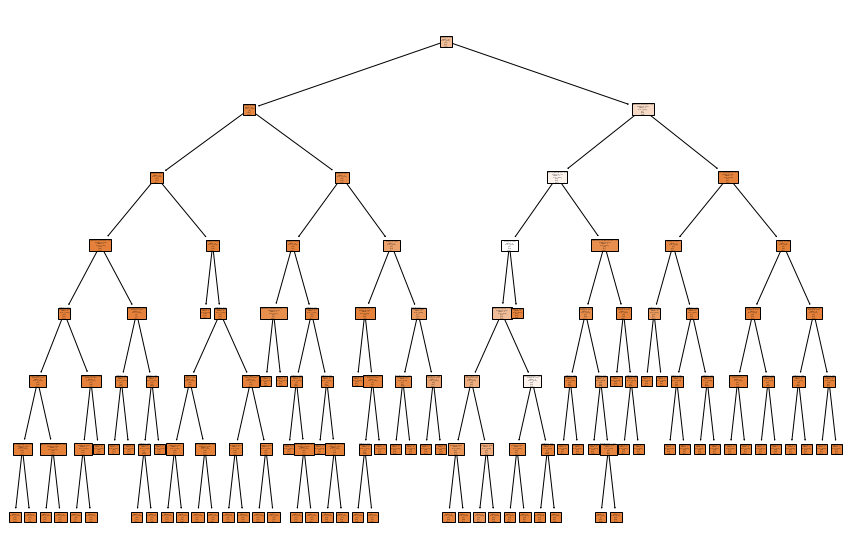

In [ ]:
plt.rcParams["figure.figsize"] = (15,10)
plot_tree(rf.estimators_[499],max_depth=None,
          feature_names=X_trainNo.columns, 
          filled=True)

In [ ]:
y_trainNo.describe()

,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
count,3.470000e+02,3.470000e+02,3.470000e+02,347.000000
mean,9.279438e+10,2.203153e+10,2.632337e+10,23344.962786
std,1.184817e+11,4.090512e+10,2.833103e+10,49571.015362
min,1.526351e+09,6.812672e+08,7.627653e+08,130.187741
25%,1.735192e+10,4.439716e+09,5.725850e+09,2052.016524
50%,4.344534e+10,1.154873e+10,1.348120e+10,4924.789454
75%,1.283841e+11,2.807196e+10,4.296228e+10,25724.213755
max,6.402769e+11,4.014402e+11,1.512824e+11,429888.271504


In [ ]:
y_testNo.describe()

,peak_disk_usage,peak_sim_ram_usage,peak_results_ram_usage,totaljobclocktimesec
count,8.700000e+01,8.700000e+01,8.700000e+01,87.000000
mean,8.339006e+10,2.374929e+10,2.358577e+10,27312.784292
std,1.056718e+11,5.484020e+10,2.720161e+10,68324.308956
min,2.364393e+09,6.911754e+08,7.633592e+08,207.862526
25%,1.166542e+10,2.732374e+09,3.825408e+09,1162.581320
50%,2.600459e+10,8.345539e+09,8.806523e+09,3143.066294
75%,1.135874e+11,2.548270e+10,3.674266e+10,23120.454350
max,5.925269e+11,3.635230e+11,1.375037e+11,444888.271504


In [ ]:
def plot_diff(y_true,y_pred,title='',lab=''):
    plt.title(title)
    plt.scatter(y_true,y_pred)
#     plt.yscale('log')
#     plt.xscale('log')
    plt.xlabel(lab+'(True values)')
    plt.ylabel(lab+'(Pred Values)')
    plt.axis('equal')
#     plt.axis('square')
    plt.xlim(plt.xlim())
    plt.ylim(plt.ylim())
    p1 = max(max(y_true),max(y_pred))
    p2 = min(min(y_true),min(y_pred))
    plt.plot([p1,p2],[p1,p2],'b-')
    plt.grid()
    plt.show()

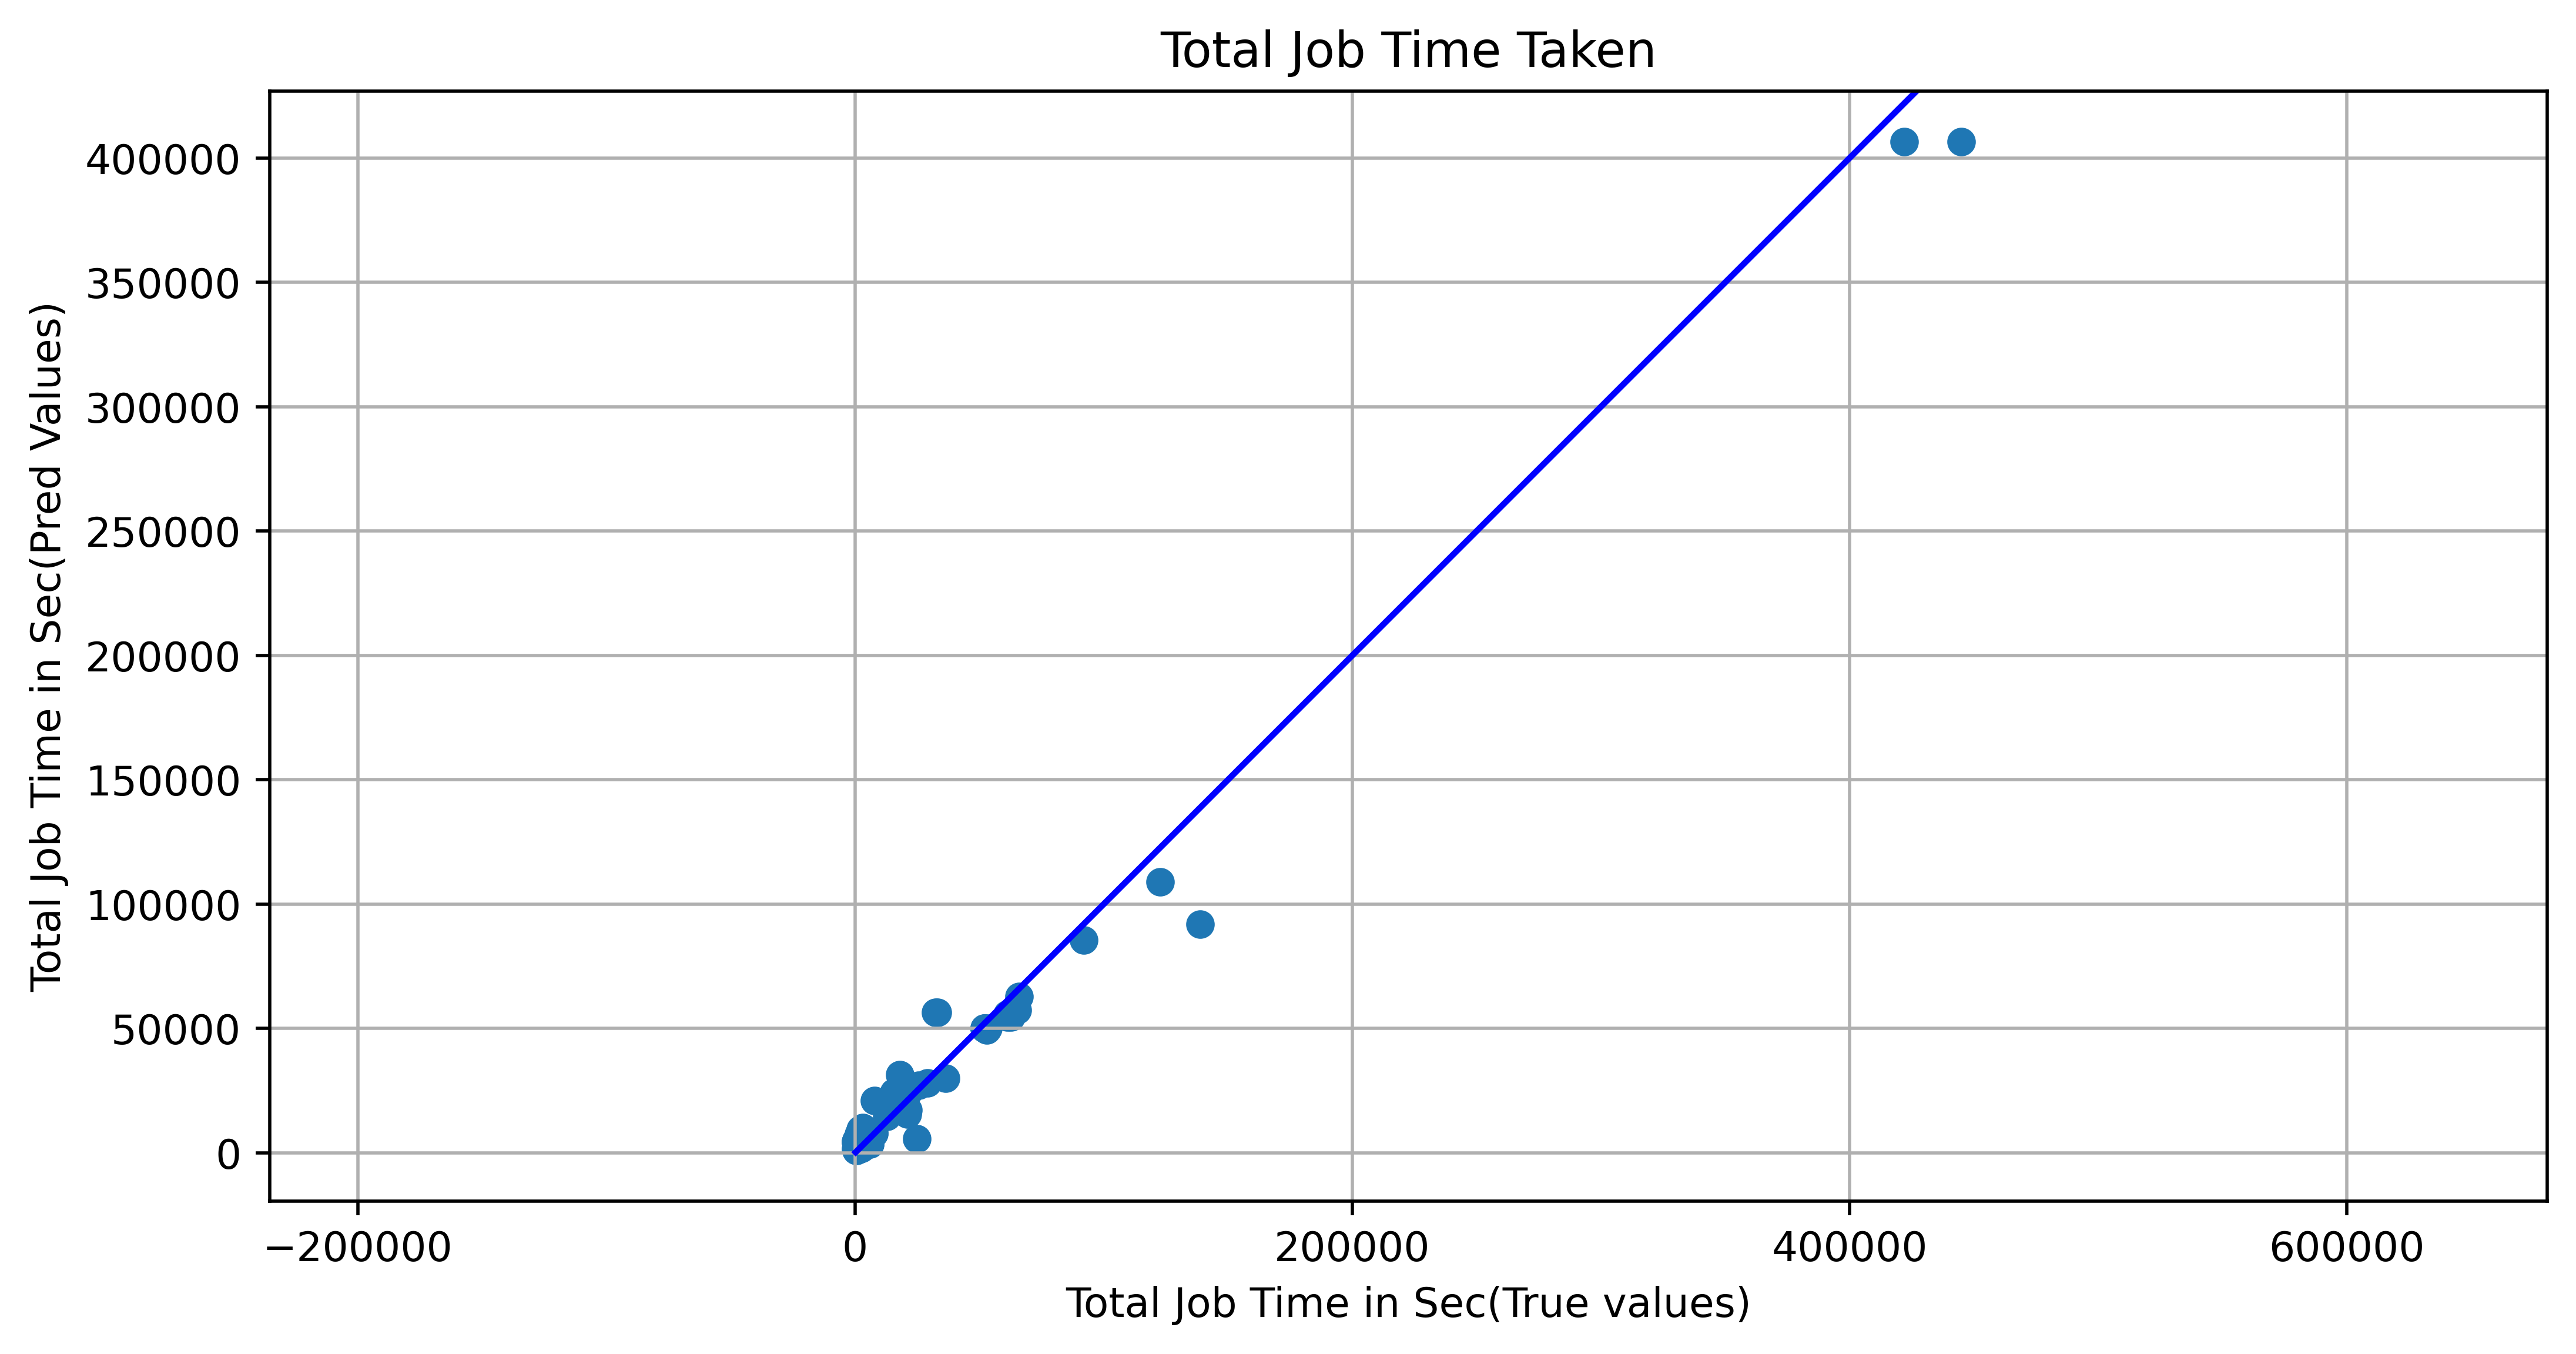

In [ ]:
plt.rcParams["figure.figsize"] = (10,5)
plt.rcParams["figure.dpi"] = 500
plot_diff(y_testNo.totaljobclocktimesec,y_pred_df.totaljobclocktimesec,title='Total Job Time Taken',lab='Total Job Time in Sec')